The source
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?sort=votes

so far main source 
https://www.kaggle.com/code/prashant111/extensive-analysis-eda-fe-modelling


https://docs.google.com/spreadsheets/d/e/2PACX-1vRo05lqGFkl7Jtt4o9Dqqk8JEA-U956-sxJVT-klWrKp8nTvboOkyyYVH-Z4sccFdpvfZhd40eGhU2J/pubhtml


In [75]:
import pandas as pd
import numpy as np

#sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

#for data splitting
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

#to not show warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [76]:
df = pd.read_csv('weatherAUS copy.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [77]:
#to format column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [78]:
df.shape

(145460, 23)

In [79]:
col_names = df.columns

col_names

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [80]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
maxtemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
windgustspeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
windspeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
windspeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Now let's summarize the info from the data.

In [82]:
def check(df):
    lst=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        lst.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(lst)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [83]:
check(df)

,column,dtypes,nunique,sum_null
0,date,object,3436,0
1,location,object,49,0
2,mintemp,float64,389,1485
3,maxtemp,float64,505,1261
4,rainfall,float64,681,3261
5,evaporation,float64,358,62790
6,sunshine,float64,145,69835
7,windgustdir,object,16,10326
8,windgustspeed,float64,67,10263
9,winddir9am,object,16,10566


In [84]:
#check the percentage of missing values
len = df.shape[0]
def calculate_missing_percent(df):
    lst=[]
    columns=df.columns
    for col in columns:
        missing_percent=round(df[col].isnull().sum()/df.shape[0]*100, 2)
        lst.append([col, missing_percent])
    df_missing_percent=pd.DataFrame(lst)
    df_missing_percent.columns=['column', 'missing values %']
    return df_missing_percent

calculate_missing_percent(df)

,column,missing values %
0,date,0.00
1,location,0.00
2,mintemp,1.02
3,maxtemp,0.87
4,rainfall,2.24
5,evaporation,43.17
6,sunshine,48.01
7,windgustdir,7.10
8,windgustspeed,7.06
9,winddir9am,7.26


As can be seen ['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'] columns has more very high percentage of missing values... 

Now let's visulize the data

In [87]:
print(df['raintomorrow'].isnull().sum())

print(df['raintomorrow'].unique())

print(df['raintomorrow'].value_counts())

3267
['No' 'Yes' nan]
No     110316
Yes     31877
Name: raintomorrow, dtype: int64


As we can see there are some missing values of the target variable, percentage is very low < 2.25%, so I have decided the simply drop them.

In [88]:
df = df.dropna(how='any',
                    subset=['raintomorrow'])

In [89]:
print(df['raintomorrow'].isnull().sum())

print(df['raintomorrow'].unique())

print(df['raintomorrow'].value_counts())

0
['No' 'Yes']
No     110316
Yes     31877
Name: raintomorrow, dtype: int64


<AxesSubplot:xlabel='raintomorrow', ylabel='count'>

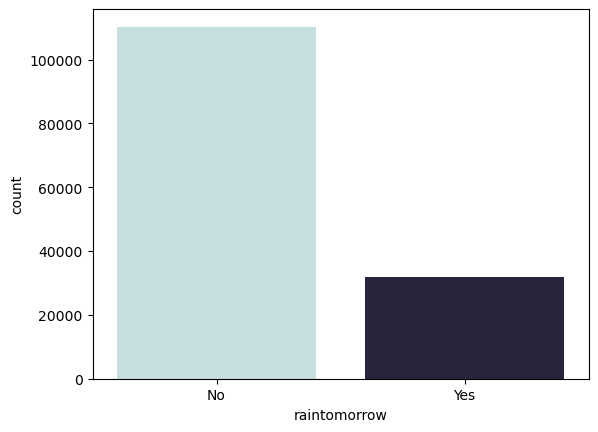

In [91]:
sns.countplot(x = df['raintomorrow'], palette ="ch:start=.2,rot=-.3")

Now let's study categorical and Numerical columns

In [92]:
#df_base.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(f"There are {7} : {categorical_columns}:")

#Come back and fix it...

There are 7 : ['date', 'location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']:


Now date enginnering, we need to check data type and split into year, month and date...

In [94]:
a = df['date'].dtypes == 'O'

print(f'Is Date an Object type? {a}')

#Could be also improved, I may will replace with a

Is Date an Object type? True


In [98]:
#now lets split date object into year, month, day
#converting from object into datetime type
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [99]:
#To check if we did everythin OK
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [101]:
#remove original Date column
df.drop('date', axis=1, inplace=True)

Now lets check numerical columns

In [102]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
print(f"There are {19} : {numerical_columns}:")

There are 19 : ['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'year', 'month', 'day']:


In numerical values, from the initial look, we have mssing values and outliers, 
maybe we need to apply also log1p!

For outlier detection I will use https://pub.towardsai.net/outlier-detection-and-treatment-a-beginners-guide-c44af0699754 tutorial.

In [103]:
cancer_map = {'B' : 0, 'M' : 1}
df['diagnosis'] = df['diagnosis'].map(cancer_map)

#also lets drop the id column
#commented to avoid error rise
#df = df.drop('id', axis=1)

KeyError: 'diagnosis'

In [ ]:
#checking out the result
df.head()

At this stage, we checked the data. now we need to plot some graphs to get more sense of it

First I will do random forest. 

In [ ]:
df_temp_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_temp_train, test_size=0.25, random_state=42)

print(df_train.shape[0], df_test.shape[0], df_val.shape[0])

In [ ]:
y_train = df_train['diagnosis'].values
y_val = df_val['diagnosis'].values
y_test = df_test['diagnosis'].values

In [ ]:
X_train = df_train.drop('diagnosis', axis=1).copy()
X_val = df_val.drop('diagnosis', axis=1).copy()
X_test = df_test.drop('diagnosis', axis=1).copy()

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=2,
    min_samples_leaf=5,
    n_jobs=-1
    )
rfc.fit(X_train, y_train)

In [ ]:
y_score = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

Let's tune n_estimators (number of trees)

In [ ]:
aucs = []

for i in range(1, 5, 1):
    rfc = RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1
        )
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

In [ ]:
plt.plot(range(1, 5, 1), aucs)
plt.ylim(0.8, 1)

I have tried various n_estimators, it can be seen it doesn't give you much difference. 

let's try to also tune another parameters.

n_estimators I will put n_estimators = 5

In [ ]:
max_depth_start = 1
max_depth_end = 8
max_deth_step = 1

aucs = []

for j in range(max_depth_start, max_depth_end, max_deth_step):
    rfc = RandomForestClassifier(
        n_estimators=5,
        max_depth = j,
        n_jobs=-1
        )
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

plt.plot(range(max_depth_start, max_depth_end, max_deth_step), aucs)
plt.ylim(0.7, 1)

In [ ]:
#dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=df.feature_names_)
